In [3]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import metrics
from sklearn.metrics import recall_score


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
train = pd.read_csv("C:\\Users\\riten\\Desktop\\Dataset\\train.csv")
test = pd.read_csv("C:\\Users\\riten\\Desktop\\Dataset\\test.csv")


Using TensorFlow backend.


In [4]:
from sklearn import preprocessing

In [5]:
train


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,CR_88991,11-JAN-02,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34,1
23852,CR_46369,05-FEB-97,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43,1
23853,CR_157556,03-APR-12,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18,1
23854,CR_103180,25-JAN-04,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43,1


In [6]:
test

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [8]:
train.sum(axis = 0, skipna = True) 

INCIDENT_ID         CR_102659CR_189752CR_184637CR_139071CR_109335C...
DATE                04-JUL-0418-JUL-1715-MAR-1713-FEB-0913-APR-050...
X_1                                                             11541
X_2                                                            591419
X_3                                                            587751
X_4                                                            102026
X_5                                                             58581
X_6                                                            146814
X_7                                                            116334
X_8                                                             23199
X_9                                                            117470
X_10                                                            29696
X_11                                                          4937107
X_12                                                            23060
X_13                

In [9]:
values = {'X_12': 0,}
train = train.fillna(value=values)

In [10]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.966633,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.166346,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [11]:
#### We have gotten rid of the NA values in column X_12. 

In [12]:
from matplotlib import pyplot as plt

In [13]:
y = train.iloc[:,17]

In [14]:
y

0        0
1        1
2        1
3        1
4        1
        ..
23851    1
23852    1
23853    1
23854    1
23855    1
Name: MULTIPLE_OFFENSE, Length: 23856, dtype: int64

In [15]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2,random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19084, 18) (19084,)
(4772, 18) (4772,)


In [16]:
X_train  = X_train.iloc[:,2:17]
X_test = X_test.iloc[:,2:17]

In [17]:
X_train

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
12752,0,4,4,6,5,1,0,3,6,1,174,1.0,72,142,34
13851,1,49,49,6,5,15,10,0,5,2,249,2.0,103,130,34
1127,0,33,32,2,1,5,6,0,5,1,249,1.0,103,142,34
4300,7,36,34,2,1,9,8,0,5,1,249,1.0,92,93,34
1950,0,4,4,6,5,4,2,0,5,1,249,1.0,103,130,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,33,32,2,1,6,4,0,5,1,174,0.0,72,93,48
578,0,24,24,0,0,7,1,1,6,1,316,0.0,103,53,34
5848,0,21,23,4,1,4,2,0,5,1,174,1.0,103,93,34
2439,0,4,4,6,5,4,2,0,5,2,127,2.0,103,142,34


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 12752 to 23572
Data columns (total 15 columns):
X_1     19084 non-null int64
X_2     19084 non-null int64
X_3     19084 non-null int64
X_4     19084 non-null int64
X_5     19084 non-null int64
X_6     19084 non-null int64
X_7     19084 non-null int64
X_8     19084 non-null int64
X_9     19084 non-null int64
X_10    19084 non-null int64
X_11    19084 non-null int64
X_12    19084 non-null float64
X_13    19084 non-null int64
X_14    19084 non-null int64
X_15    19084 non-null int64
dtypes: float64(1), int64(14)
memory usage: 2.3 MB


In [19]:
unique, count = np.unique(y_train,return_counts=True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 867, 1: 18217}

In [20]:
sm = SMOTE(random_state =42)
x_train_res , y_train_res = sm.fit_sample(X_train,y_train)

In [21]:
x_train_res.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000
mean,0.358127,25.537136,25.352226,4.113850,2.341686,5.965444,4.687792,0.929763,4.820689,1.721963,185.381182,1.265315,85.191250,74.366910,32.837761
std,1.180928,15.340450,15.233944,2.740508,1.871341,4.291832,3.700267,1.465336,1.287203,1.256799,87.034191,1.230489,27.178306,42.959979,8.276094
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,9.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,26.000000,27.000000,4.000000,2.000000,5.000000,4.000000,1.000000,5.000000,1.000000,176.000000,1.000000,98.000000,80.000000,34.000000
75%,0.000000,37.000000,37.000000,6.000000,4.000000,8.000000,7.000000,1.000000,6.000000,2.000000,249.000000,1.534653,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000


In [22]:
y_train_res.describe()

count    36434.000000
mean         0.500000
std          0.500007
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: MULTIPLE_OFFENSE, dtype: float64

In [23]:
unique2, count2 = np.unique(y_train_res,return_counts=True)
y_train_dict_value_count2 = {k:v for (k,v) in zip(unique2,count2)}
y_train_dict_value_count2

{0: 18217, 1: 18217}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [11,12,13,14, 15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 750,1000,1250]
}
# Create a based model
rf = RandomForestClassifier(random_state = 0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [25]:
# Fit the grid search to the data
grid_search.fit(x_train_res, y_train_res)
grid_search.best_params_





Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 125.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 172.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 224.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 283.7min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
#{'bootstrap': True,
#'max_depth': 80,
#'max_features': 12,
#'min_samples_leaf': 3,
#'min_samples_split': 8,
#'n_estimators': 300}

In [27]:
def evaluate(rf, X_test, y_test):
    predictions = rf.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [28]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.0015 degrees.
Accuracy = 99.85%.


In [35]:
final_model = RandomForestClassifier(random_state = 0,bootstrap = True, max_depth=  80, max_features = 12, min_samples_leaf = 3,min_samples_split = 8,n_estimators = 300)

In [36]:
final_model.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
recall_score(y_test, final_model.predict(X_test))


0.998468606431853

In [38]:
print('Precision Score %.3f' % metrics.precision_score(y_test, final_model.predict(X_test)))
print('Recall Score %.3f' % metrics.recall_score(y_test, final_model.predict(X_test)))
print('F1 Score %.3f' % metrics.f1_score(y_test, final_model.predict(X_test)))

Precision Score 1.000
Recall Score 0.998
F1 Score 0.999


In [39]:
X_test_final = test.iloc[:,2:17]

In [42]:
X_test_final.sum(axis = 0, skipna = True) 

X_1        7444.0
X_2      393164.0
X_3      390817.0
X_4       68132.0
X_5       38938.0
X_6       96768.0
X_7       77330.0
X_8       15692.0
X_9       78064.0
X_10      19739.0
X_11    3291191.0
X_12      15338.0
X_13    1354794.0
X_14    1148492.0
X_15     531520.0
dtype: float64

In [43]:
values = {'X_12': 0,}
X_test_final = X_test_final.fillna(value=values)

In [44]:
final_model.predict(X_test_final)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
result_dataframe = pd.DataFrame(final_model.predict(X_test_final.iloc[0:,:]))

In [46]:
## Lets rename the Column as Multiple Offence
result_dataframe.columns = ['MULTIPLE_OFFENSE']


In [47]:
## Now lets add the Column for accident ID For the submission format
result_dataframe["INCIDENT_ID"] = test["INCIDENT_ID"]

In [48]:

columns_titles = ['MULTIPLE_OFFENSE','INCIDENT_ID']
result_dataframe=result_dataframe.reindex(columns=columns_titles)

In [49]:
result_dataframe

,MULTIPLE_OFFENSE,INCIDENT_ID
0,1,CR_195453
1,1,CR_103520
2,1,CR_196089
3,1,CR_112195
4,1,CR_149832
...,...,...
15898,1,CR_44468
15899,1,CR_158460
15900,1,CR_115946
15901,1,CR_137663


In [50]:
result_dataframe.to_csv('C:\\Users\\riten\\Desktop\\Submission11.csv', index='False') 

In [53]:
import sklearn.metrics

In [59]:
sklearn.metrics.confusion_matrix(y_test, final_model.predict(X_test) )

NameError: name 'X_train_res' is not defined

In [142]:
#X_scaled = preprocessing.scale(X)

In [48]:
#LR = LogisticRegression(random_state=21, solver='lbfgs', multi_class='ovr').fit(X_scaled, y)

In [49]:
#LR.predict(X.iloc[1:11,:])
#round(LR.score(X,y), 4)

0.8506

In [37]:
#LR.predict(X.iloc[0:20,:])

NameError: name 'LR' is not defined

In [76]:
#LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [51]:
#from sklearn.ensemble import RandomForestClassifier

#RF = RandomForestClassifier(n_estimators=1250, max_depth=128, random_state=0,min_samples_split=3)
#RF.fit(X_scaled, y)
#RF.predict(X_scaled)
#round(RF.score(X_scaled,y), 4)

0.9991

In [134]:
#RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=200, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
#Xtest = test.iloc[:,2:16]

In [54]:
#Xtest

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29
15899,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93
15900,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62
15901,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62


In [56]:
#Xtest['X_12'] = Xtest['X_12'].fillna(0)

In [57]:
#RF.predict(Xtest)

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [58]:
#result_dataframe = pd.DataFrame(RF.predict(Xtest.iloc[0:,:]))


In [59]:
#result_dataframe

,0
0,0
1,1
2,1
3,1
4,0
...,...
15898,0
15899,0
15900,0
15901,1


In [61]:
## Lets rename the Column as Severity
#result_dataframe.columns = ['MULTIPLE_OFFENSE']

In [62]:
## Having a look at the current dataframe
#result_dataframe

,MULTIPLE_OFFENSE
0,0
1,1
2,1
3,1
4,0
...,...
15898,0
15899,0
15900,0
15901,1


In [63]:
## Now lets add the Column for accident ID For the submission format
## result_dataframe["INCIDENT_ID"] = test["INCIDENT_ID"]

In [64]:
#result_dataframe

,MULTIPLE_OFFENSE,INCIDENT_ID
0,0,CR_195453
1,1,CR_103520
2,1,CR_196089
3,1,CR_112195
4,0,CR_149832
...,...,...
15898,0,CR_44468
15899,0,CR_158460
15900,0,CR_115946
15901,1,CR_137663


In [67]:

#result_dataframe.set_index('INCIDENT_ID')



,MULTIPLE_OFFENSE
INCIDENT_ID,
CR_195453,0
CR_103520,1
CR_196089,1
CR_112195,1
CR_149832,0
...,...
CR_44468,0
CR_158460,0
CR_115946,0


In [68]:
#result_dataframe

,MULTIPLE_OFFENSE,INCIDENT_ID
0,0,CR_195453
1,1,CR_103520
2,1,CR_196089
3,1,CR_112195
4,0,CR_149832
...,...,...
15898,0,CR_44468
15899,0,CR_158460
15900,0,CR_115946
15901,1,CR_137663


In [69]:

#columns_titles = ['MULTIPLE_OFFENSE','INCIDENT_ID']
#result_dataframe=result_dataframe.reindex(columns=columns_titles)

In [70]:
#result_dataframe

,MULTIPLE_OFFENSE,INCIDENT_ID
0,0,CR_195453
1,1,CR_103520
2,1,CR_196089
3,1,CR_112195
4,0,CR_149832
...,...,...
15898,0,CR_44468
15899,0,CR_158460
15900,0,CR_115946
15901,1,CR_137663


In [71]:
#neworder = ['INCIDENT_ID','MULTIPLE_OFFENSE']
#result_dataframe=result_dataframe.reindex(columns=neworder)

In [72]:
#result_dataframe

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,0
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,0
...,...,...
15898,CR_44468,0
15899,CR_158460,0
15900,CR_115946,0
15901,CR_137663,1


In [73]:
#result_dataframe.to_csv('C:\\Users\\riten\\Desktop\\Submission101.csv', index='False') 

In [ ]:
#########################################################################################################################

SyntaxError: invalid syntax (<ipython-input-152-1ba0a4402c12>, line 5)

In [114]:
#Lets have a look at the individual colums and plot them. Are there any noticable outliers?

import seaborn as sns

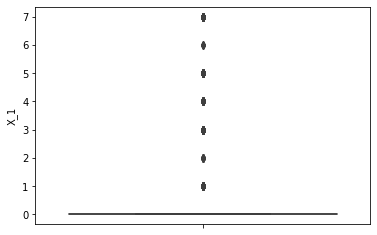

In [115]:
sns.boxplot( y="X_1", data=train)

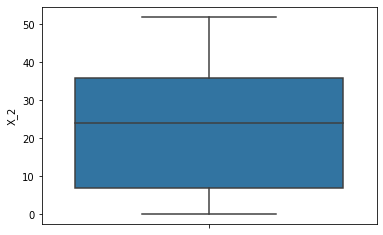

In [116]:
## We can see quite a few outliers, lets check out the other variables
sns.boxplot( y="X_2", data=train)


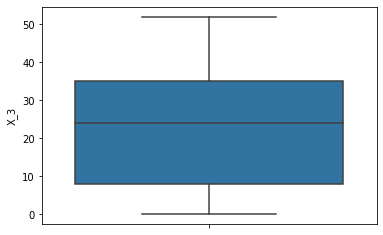

In [117]:
## We can see quite a few outliers, lets check out the other variables
sns.boxplot( y="X_3", data=train)


{'whiskers': [<matplotlib.lines.Line2D at 0x1884c0d7948>,
 'caps': [<matplotlib.lines.Line2D at 0x1884c0d7f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1884c0d7188>,
 'medians': [<matplotlib.lines.Line2D at 0x1884c0dee48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1884c0e3cc8>,
 'means': []}

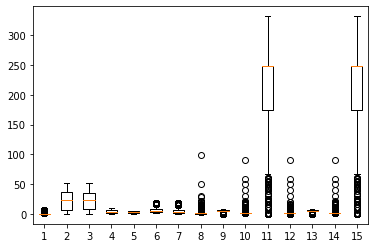

In [119]:
### Making boxplots to see the distribution of outliers
x1 = train.X_1
x2 = train.X_2
x3 = train.X_3
x4 = train.X_4
x5 = train.X_5
x6 = train.X_6
x7 = train.X_7
x8 = train.X_8
x9 = train.X_9
x10 = train.X_10
x11 = train.X_11
x12 = train.X_12
x13 = train.X_9
x14 = train.X_10
x15 = train.X_11

plt.boxplot ([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 , x11,x12,x13,x14,x15])

In [132]:
from scipy import stats

In [133]:
X_train_new = train.iloc[:,2:18]

In [134]:
X_train_new.info

<bound method DataFrame.info of        X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  X_13  \
0        0   36   34    2    1    5    6    1    6     1   174   1.0    92   
1        1   37   37    0    0   11   17    1    6     1   236   1.0   103   
2        0    3    2    3    5    1    0    2    3     1   174   1.0   110   
3        0   33   32    2    1    7    1    1    6     1   249   1.0    72   
4        0   33   32    2    1    8    3    0    5     1   174   0.0   112   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
23851    1   47   48    7    3   15   10    1    5     1   174   0.0    98   
23852    0   33   32    2    1    5    6    0    5     1   174   0.0   112   
23853    0   25   25    9    0    3    5    1    6     1   174   0.0    10   
23854    0   39   39    6    5    2    7    1    6     1   127   0.0   112   
23855    7   36   34    2    1    9    8    0    5     1   249   1.0    92   

       X_14  X_15  MULTIPLE_OFF

In [135]:
z_scores = stats.zscore(X_train_new)
##calculate z-scores of df

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = X_train_new[filtered_entries]

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21744 entries, 1 to 23854
Data columns (total 16 columns):
X_1                 21744 non-null int64
X_2                 21744 non-null int64
X_3                 21744 non-null int64
X_4                 21744 non-null int64
X_5                 21744 non-null int64
X_6                 21744 non-null int64
X_7                 21744 non-null int64
X_8                 21744 non-null int64
X_9                 21744 non-null int64
X_10                21744 non-null int64
X_11                21744 non-null int64
X_12                21744 non-null float64
X_13                21744 non-null int64
X_14                21744 non-null int64
X_15                21744 non-null int64
MULTIPLE_OFFENSE    21744 non-null int64
dtypes: float64(1), int64(15)
memory usage: 2.8 MB


In [138]:
y = new_df.iloc[:,15]

In [139]:
y

1        1
2        1
3        1
4        1
5        1
        ..
23850    1
23851    1
23852    1
23853    1
23854    1
Name: MULTIPLE_OFFENSE, Length: 21744, dtype: int64

In [146]:
for_X =  new_df.iloc[:,0:15]

In [147]:
for_X

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43
5,0,45,45,10,3,1,0,1,6,1,303,1.0,72,62,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23850,0,4,4,6,5,1,0,2,6,1,0,1.0,72,29,34
23851,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34
23852,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43
23853,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18


In [148]:
# create training and testing vars
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(for_X, y, test_size=0.2,random_state=33)
print(X_train_best.shape, y_train_best.shape)
print(X_test_best.shape, y_test_best.shape)

(17395, 15) (17395,)
(4349, 15) (4349,)


In [149]:
X_train_best

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
11690,0,37,37,0,0,4,2,1,6,1,316,1.0,72,107,34
7488,0,28,28,3,5,6,4,1,6,1,249,1.0,98,62,34
2029,0,49,49,6,5,4,2,0,5,2,249,2.0,103,62,34
20674,0,4,4,6,5,2,7,3,3,2,127,2.0,103,142,34
9648,0,25,25,9,0,4,2,1,6,1,316,1.0,103,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11408,0,23,21,4,1,6,4,0,5,1,174,0.0,72,29,23
62,0,19,19,1,3,6,4,1,6,1,249,1.0,103,29,34
618,0,33,32,2,1,6,4,0,5,1,249,1.0,110,119,34
6395,0,42,42,7,3,7,1,1,6,1,0,0.0,103,29,34


In [150]:


RF2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0,min_samples_split=2)
RF2.fit(X_train_best, y_train_best)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [152]:
RF2.predict(X_test_best)
round(RF2.score(X_test_best,y_test_best), 4)

1.0

In [154]:
X_test_final = test.iloc[:,2:17]

In [156]:
values = {'X_12': 1,}
X_test_final_2 = X_test_final.fillna(value=values)

In [161]:
RF2.predict(X_test_final_2)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [162]:
with_eda = pd.DataFrame(RF2.predict(X_test_final_2))

In [163]:
## Lets rename the Column as Multiple Offence
with_eda.columns = ['MULTIPLE_OFFENSE']

In [166]:
## Now lets add the Column for accident ID For the submission format
with_eda["INCIDENT_ID"] = test["INCIDENT_ID"]

In [167]:

columns_titles = ['MULTIPLE_OFFENSE','INCIDENT_ID']
with_eda=with_eda.reindex(columns=columns_titles)

In [168]:
with_eda.to_csv('C:\\Users\\riten\\Desktop\\Submissioneda.csv', index='False') 

df = pd.DataFrame(data,columns=['A','B','C'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

result_dataframe3.to_csv('C:\\Users\\riten\\Desktop\\Submission3.csv', index='False')

RF3 = RandomForestClassifier(max_depth= 128, max_features= 8, min_samples_split= 4, n_estimators= 300)
RF3.fit(X, y)
RF3.predict(X.iloc[0:,:])
round(RF3.score(X,y), 4)

result_dataframe4 = pd.DataFrame(RF3.predict(Xtest.iloc[0:,:]))

result_dataframe4.to_csv('C:\\Users\\riten\\Desktop\\Submission4.csv', index='False')

RF4 = RandomForestClassifier(max_depth= 15, min_samples_split= 3, n_estimators= 100)
RF4.fit(X, y)
RF4.predict(X.iloc[0:,:])
round(RF4.score(X,y), 4)

result_dataframe5 = pd.DataFrame(RF4.predict(Xtest.iloc[0:,:]))

result_dataframe4.to_csv('C:\\Users\\riten\\Desktop\\Submission5.csv', index='False')

RF5 = RandomForestClassifier(max_depth= 128, min_samples_split= 3, n_estimators= 1250)
RF5.fit(X, y)
RF5.predict(X.iloc[0:,:])
round(RF5.score(X,y), 4)

result_dataframe5 = pd.DataFrame(RF5.predict(Xtest.iloc[0:,:]))

result_dataframe5.to_csv('C:\\Users\\riten\\Desktop\\Submission6.csv', index='False')

RF6 = RandomForestClassifier(max_depth= 128, min_samples_split= 6, n_estimators= 1250)
RF6.fit(X, y)
RF6.predict(X.iloc[0:,:])
round(RF6.score(X,y), 4)

result_dataframe6 = pd.DataFrame(RF6.predict(Xtest.iloc[0:,:]))

result_dataframe6.to_csv('C:\\Users\\riten\\Desktop\\Submission7.csv', index='False')

In [ ]:
##############################################################################################################################

!pip install sklearn
import sklearn

forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X, y)
y_predF = modelF.predict(Xtest)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = sklearn.model_selection.GridSearchCV(forest, hyperF, cv = 3, verbose = 1,n_jobs = -1)
bestF = gridF.fit(X, y)


bestF.best_estimator_

### This is out best tree, lets see how the test score is
RF99 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
RF99.fit(X, y)
RF99.predict(X.iloc[0:,:])
round(RF99.score(X,y), 4)

result_dataframe99 = pd.DataFrame(RF99.predict(Xtest.iloc[0:,:]))

result_dataframe99.columns = ['Severity']

result_dataframe99

## Lets Change them back to strings
result_dataframe99.Severity[result_dataframe99.Severity == 1] = 'Minor_Damage_And_Injuries'
result_dataframe99.Severity[result_dataframe99.Severity == 2] = 'Significant_Damage_And_Serious_Injuries'
result_dataframe99.Severity[result_dataframe99.Severity == 3] = 'Significant_Damage_And_Fatalities'
result_dataframe99.Severity[result_dataframe99.Severity == 4] = 'Highly_Fatal_And_Damaging'

result_dataframe99["Accident_ID"] = test["Accident_ID"]

result_dataframe99


columns_titles = ['Severity','Accident_ID']
result_dataframe99=result_dataframe99.reindex(columns=columns_titles)

result_dataframe99.to_csv('C:\\Users\\riten\\Desktop\\Submission99.csv', index='False')

#############################################################################################################################
